# L2. Coding session

## 1. Networks basics

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplot
import networkx as nx

### 1.1 Undirected graph

In [6]:
A = np.array([[0,1,1],[1,0,1],[1,1,0]])
A

array([[0, 1, 1],
       [1, 0, 1],
       [1, 1, 0]])

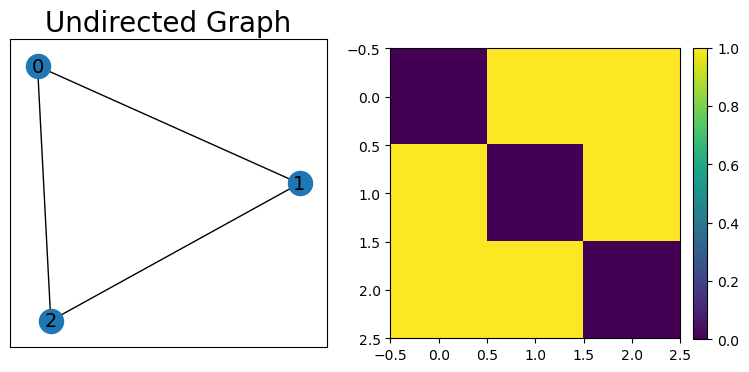

In [3]:
####convert A to NetworkX graph G
GA = nx.Graph(A)

pos=nx.spring_layout(GA)
labels = {}
for idx, node in enumerate(GA.nodes()):
    labels[node] = idx    


fig_size = plt.rcParams["figure.figsize"]  
fig_size[0] = 9; fig_size[1] = 4
plt.rcParams["figure.figsize"] = fig_size  

ax1= subplot(1,2,1)
nx.draw_networkx_nodes(GA, pos)
nx.draw_networkx_edges(GA, pos)
nx.draw_networkx_labels(GA, pos, labels, font_size=14)
plt.title('Undirected Graph',size=20)

ax2 = subplot(1,2,2)
im=ax2.imshow(A)
plt.colorbar(im, ax=ax2, fraction=0.046, pad=0.04) 

plt.show()

### 1.2 Directed graph

In [4]:
B = np.array([[0,0,0],[1,0,0],[1,1,0]])
B

array([[0, 0, 0],
       [1, 0, 0],
       [1, 1, 0]])

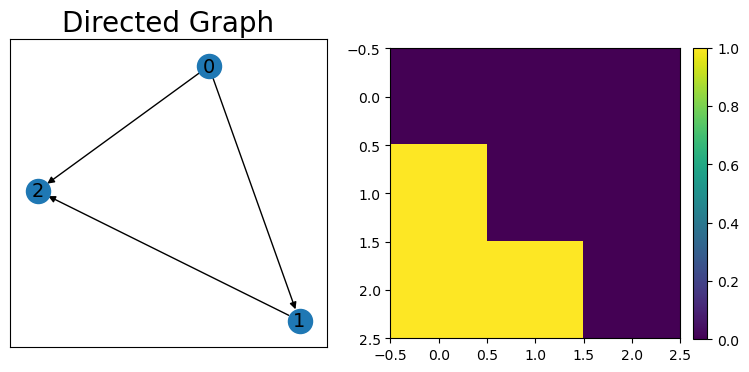

In [5]:
####convert B to NetworkX graph G
GB = nx.DiGraph(B.T)

pos=nx.spring_layout(GB)
labels = {}
for idx, node in enumerate(GB.nodes()):
    labels[node] = idx    


fig_size = plt.rcParams["figure.figsize"]  
fig_size[0] = 9; fig_size[1] = 4
plt.rcParams["figure.figsize"] = fig_size  

ax1= subplot(1,2,1)
nx.draw_networkx_nodes(GB, pos)
nx.draw_networkx_edges(GB, pos)
nx.draw_networkx_labels(GB, pos, labels, font_size=14)
plt.title('Directed Graph',size=20)

ax2 = subplot(1,2,2)
im=ax2.imshow(B)
plt.colorbar(im, ax=ax2, fraction=0.046, pad=0.04) 

plt.show()

# Exercise: Make weighted versions of A and B. Plot their graphs and adjacency matrices.

## 1.3. Some graph measures 

In [6]:
print('Degrees of A and B:')
print(nx.degree(GA), nx.degree(GB))

Degrees of A and B:
[(0, 2), (1, 2), (2, 2)] [(0, 2), (1, 2), (2, 2)]


In [7]:
print('In-Degrees of B:')
print(GB.in_degree())

In-Degrees of B:
[(0, 0), (1, 1), (2, 2)]


In [8]:
print('Out-Degrees of B:')
print(GB.out_degree())

Out-Degrees of B:
[(0, 2), (1, 1), (2, 0)]


### Density
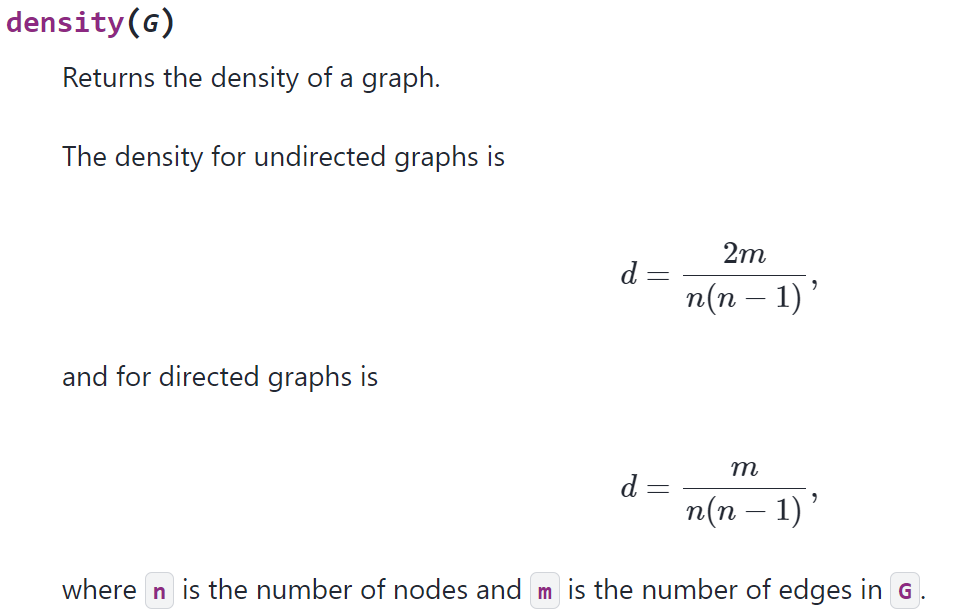

In [9]:
print('In-Degrees of B:')
print(nx.density(GA), nx.density(GB))

In-Degrees of B:
1.0 0.5


# 1.4 Generating a Random Network 

In [31]:
N=100
ConnProb=0.5

GR = nx.erdos_renyi_graph(N, ConnProb, seed=None, directed=True)
R = nx.adjacency_matrix(GR)
R = R.toarray()
R

array([[0, 1, 0, ..., 0, 1, 1],
       [0, 0, 1, ..., 0, 1, 0],
       [1, 1, 0, ..., 0, 1, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]], dtype=int32)

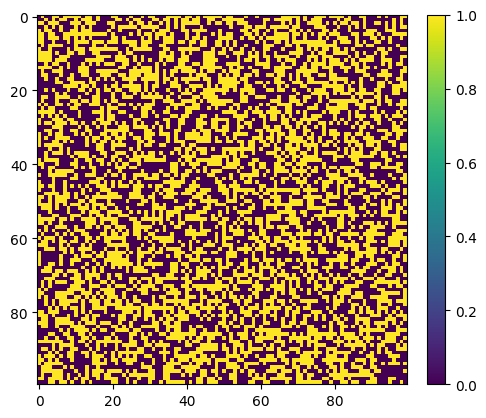

In [32]:
ax1= subplot(1,1,1)
im=ax1.imshow(R)
plt.colorbar(im, ax=ax1, fraction=0.046, pad=0.04) 

plt.show()

# 2. Reservoir Computing

### RC architecture:
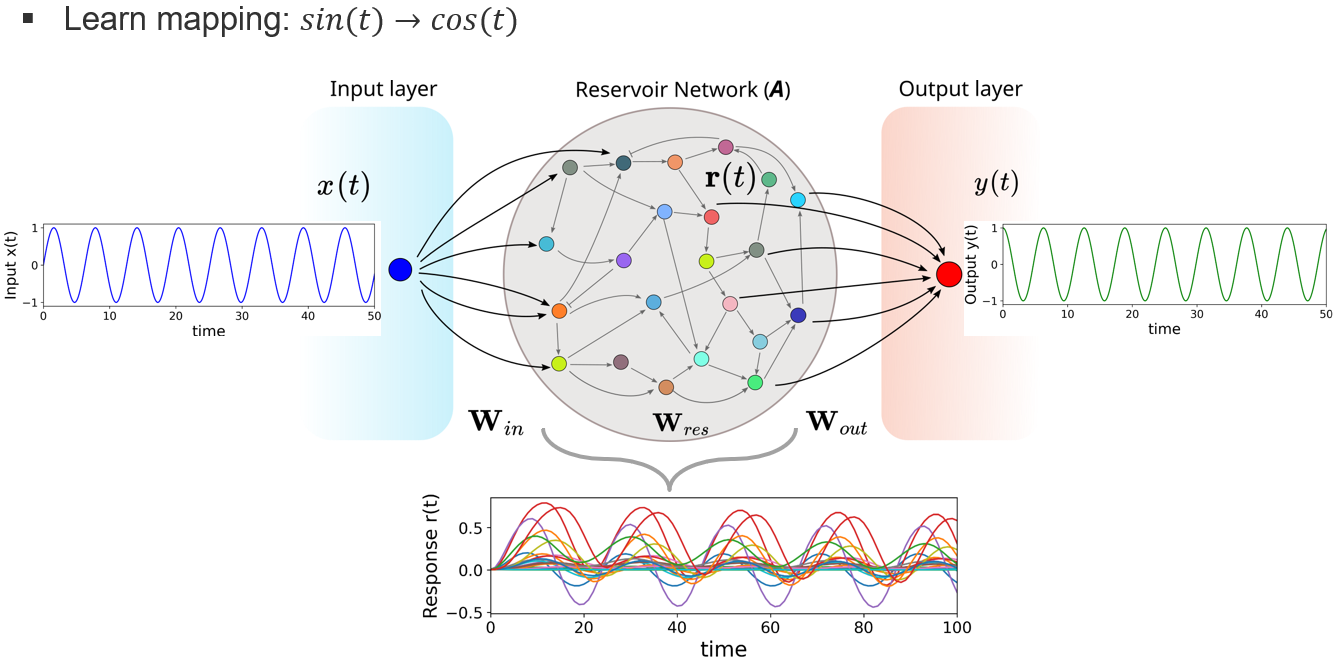

## 2.1 Generate Reservoir network

In [35]:
def ResMat(N, ConnProb, Spectral_radius):
    G = nx.erdos_renyi_graph(N, ConnProb, seed=None, directed=True)
    
    ### Remove isolated nodes
    G.remove_nodes_from(list(nx.isolates(G)))
    N = G.number_of_nodes()
    
    ### Randomize weights between (0, 1)
    Rand_weights = np.random.random((N,N))
    GNet = nx.adjacency_matrix(G).toarray()
    GNet = np.multiply(GNet,Rand_weights)
    
    ### Rescaling to a desired spectral radius 
    Spectral_radius_GNet = max(abs(np.linalg.eigvals(GNet)))
    ResMat = GNet*Spectral_radius/Spectral_radius_GNet
    
    return G, ResMat

In [36]:
Na = 10
ConnProb=0.25
eig_rho = 1 #1.1

G, GNet = ResMat(Na, ConnProb, eig_rho)

N = GNet.shape[0]
Nodes_res=N

print(N, GNet.shape, GNet)

10 (10, 10) [[0.         0.         1.40426819 0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.9660717 ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.04950301 0.         0.61763592 0.
  0.         0.         0.         0.        ]
 [0.         0.         2.03224959 1.03878209 0.         0.80978174
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  1.36591068 0.         0.         0.        ]
 [0.         0.         0.         0.         0.32403423 0.
  0.         0.         0.         0.        ]
 [0.         2.17012647 0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         1.91674301 0.         0.
  0.75389714 0.         0.         0.        ]
 [0.         0.  

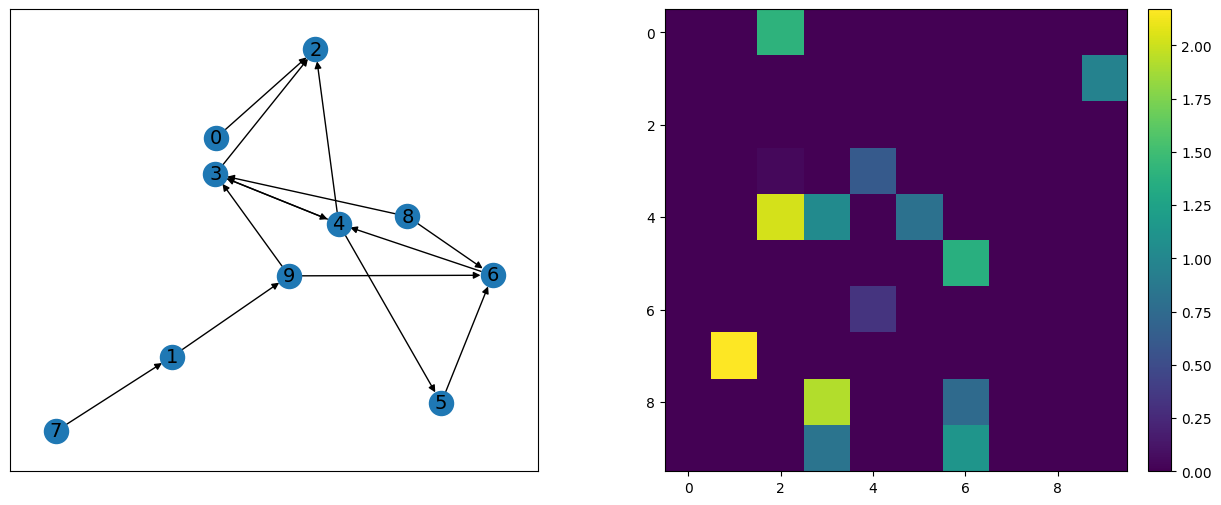

In [37]:
pos=nx.spring_layout(G)
labels = {}
for idx, node in enumerate(G.nodes()):
    labels[node] = idx    


fig_size = plt.rcParams["figure.figsize"]  
fig_size[0] = 15
fig_size[1] = 6
plt.rcParams["figure.figsize"] = fig_size  

ax1= subplot(1,2,1)
nx.draw_networkx_nodes(G, pos)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos, labels, font_size=14)

ax2 = subplot(1,2,2)
im=ax2.imshow(GNet)
plt.colorbar(im, ax=ax2, fraction=0.046, pad=0.04) 

plt.show()

## 2.2. Defining Input receiving nodes in Reservoir

In [38]:
import random 

InpNodes = int(N*0.75)

Inp1NodeList=random.sample(range(N), InpNodes)

Winp1 = np.zeros(N); 
Winp1[Inp1NodeList] = np.random.random(InpNodes)


print(Inp1NodeList, '\n\n', Winp1)

[6, 4, 9, 2, 3, 5, 8] 

 [0.         0.         0.89442174 0.5587899  0.87211176 0.71195494
 0.14593874 0.         0.55609256 0.26005267]


## 2.3. Input (Sin) and Output (Cos)

3000
(3000,)


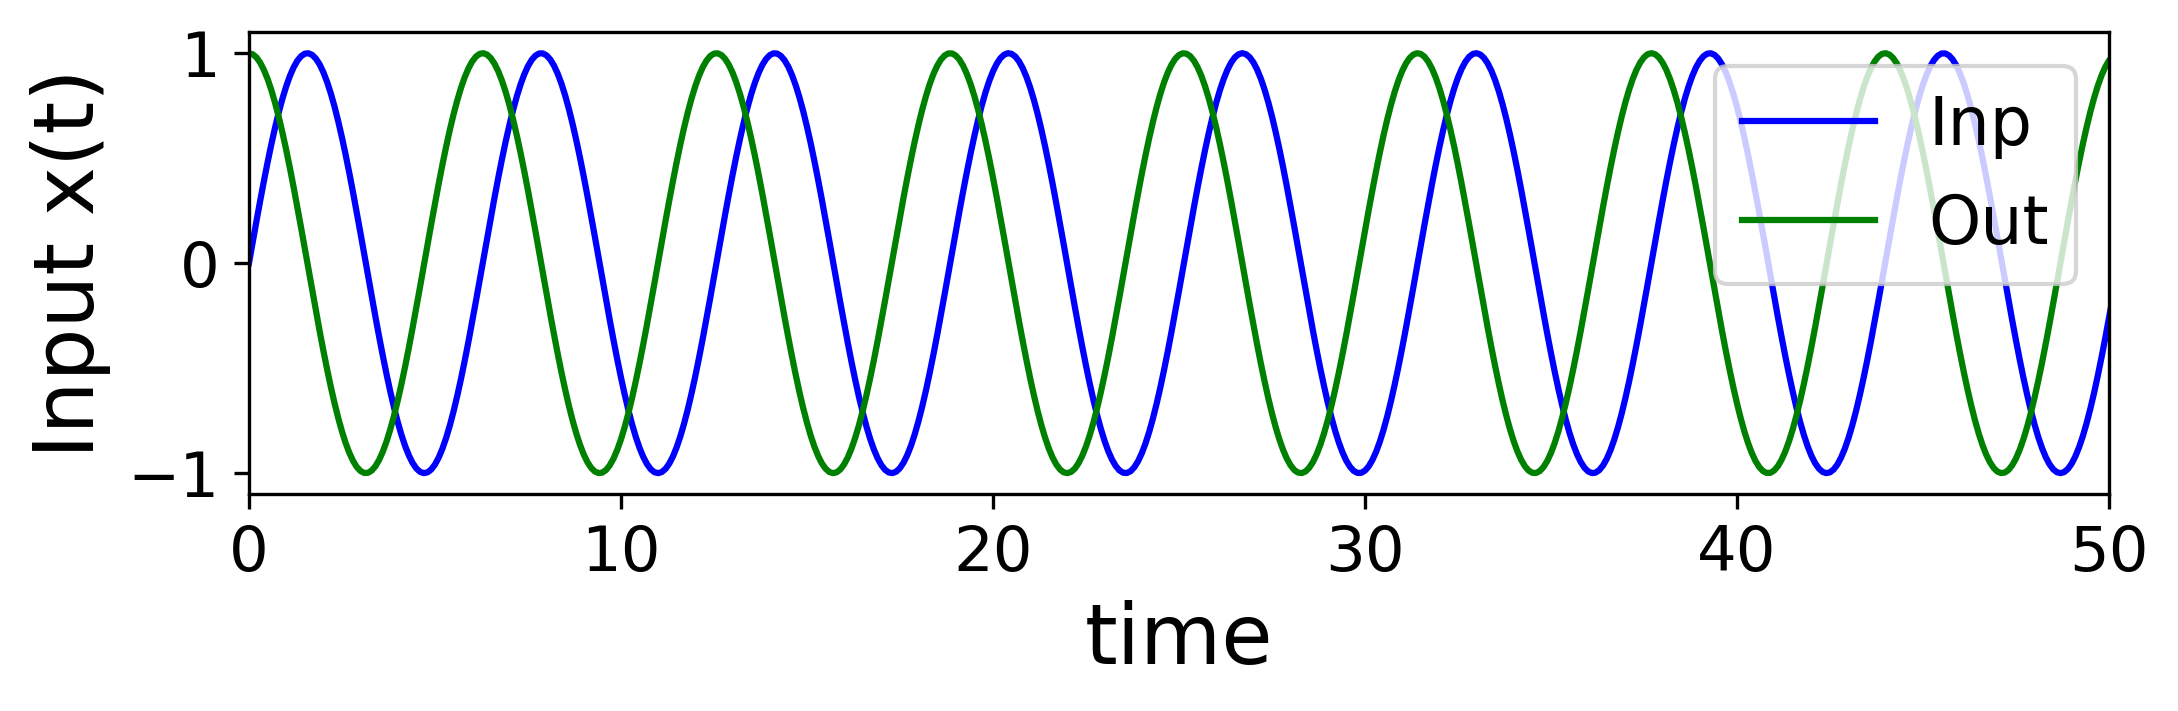

In [53]:
t = np.arange(0, 300, 0.1)

#####Input##################
omega_i1=1 
phi_i1=0
U1 = np.sin(omega_i1*t + phi_i1)

#####Output##################
omega_o1=1 
phi_o1=0
Y1 = np.cos(omega_o1*t + phi_o1)
############################

print(len(U1))
print(U1.shape)

fig_size = plt.rcParams["figure.figsize"]  
fig_size[0] = 8;  fig_size[1] = 2.5
fig, ax = plt.subplots(figsize=(8, 2), dpi=300)
ax.plot(t,U1, c='b', label='Inp')
ax.plot(t,Y1, c='g', label='Out')
ax.legend(loc='upper right', fontsize=16)
ax.set_ylabel('Input x(t)', fontsize=20)
ax.set_xlabel('time', fontsize=20)
ax.set_xlim(0, 50)
ax.tick_params(labelsize=15)
plt.show()

## 2.4. Defining a Reservoir

In [54]:
def Reservoir(GNet, Init, U, Winp, N, alpha):
    Nodes_res = GNet.shape[0]; 
    Npts_U = len(U)

    R = np.zeros([N, Npts_U])
    R[:,0] = Init
    
    #### time loop
    for t in range(0, Npts_U-1):      
        R[:,t+1] = (1 - alpha)*np.asarray(R[:,t]) + alpha*np.tanh(np.dot(GNet, R[:,t].T) + Winp*U[t] )
        
    return R

In [45]:
Transients=100 
TrPts=500
U1_Train = U1[:TrPts]
Y1_Train = Y1[:TrPts]

U1_Test = U1[TrPts:]
Y1_Test = Y1[TrPts:]

print(U1_Train.shape, Y1_Train.shape, U1_Test.shape)

(500,) (500,) (2500,)


In [55]:
alpha = 0.09999999999
Init = np.random.random(N)*0.01

Res = Reservoir(GNet, Init, U1_Train, Winp1, N, alpha)

print(Res.shape)
print(Winp1.shape)
print(U1_Train.shape)
print(Init.shape)

(10, 500)
(10,)
(500,)
(10,)


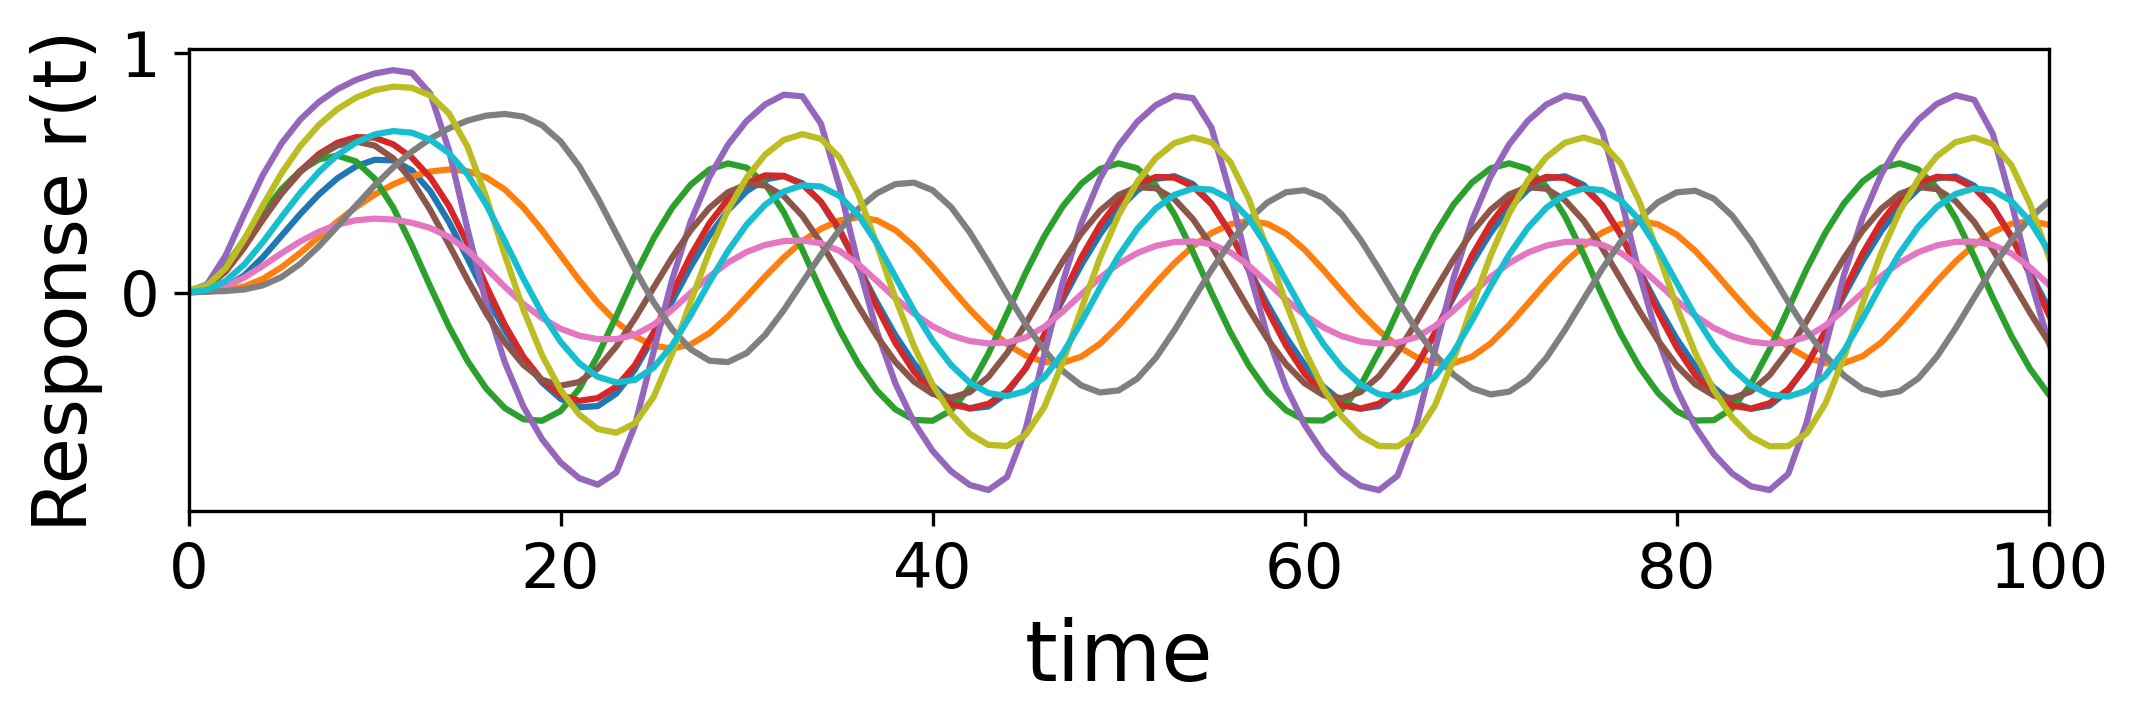

In [43]:
fig, ax = plt.subplots(figsize=(8, 2), dpi=300)
ax.plot(Res.T[::3,:])
ax.set_xlim(0, 100)
# plt.legend(loc='upper right', fontsize=12)
ax.set_xlabel('time', fontsize=20)
ax.set_ylabel('Response r(t)', fontsize=18)
ax.tick_params(labelsize=15)
plt.show()

## 2.5. Training

In [21]:
def Ridge_Regression(N, R, beta, V_train):
    W_out = np.dot(np.dot(V_train, R.T), np.linalg.inv((np.dot(R, R.T) + beta*np.identity(N))))
    return W_out

def Errors(y_predicted, y_actual):
    MSE = np.mean(np.square(np.subtract(y_predicted,y_actual)))
    Variance = (np.mean(np.square(np.subtract(y_actual, np.mean(y_actual)))))
    NMSE = MSE/Variance
    NRMSE = np.sqrt(NMSE)
    return NMSE, NRMSE 

In [22]:
beta = 5e-8

### Removing some initial transients before training 
Res_tr = Res[:,Transients:]

W_out = Ridge_Regression(N, Res_tr, beta, Y1_Train[Transients:])

W_out.shape

(10,)

## 2.6. Testing

In [23]:
Res_test = Reservoir(GNet, Init, U1_Test, Winp1, N, alpha)

Y1_Test_pred = np.dot(W_out, Res_test)
error = Errors(Y1_Test_pred[Transients:], Y1_Test[Transients:])

print(Res_test.shape, Y1_Test_pred.shape)

(10, 2500) (2500,)


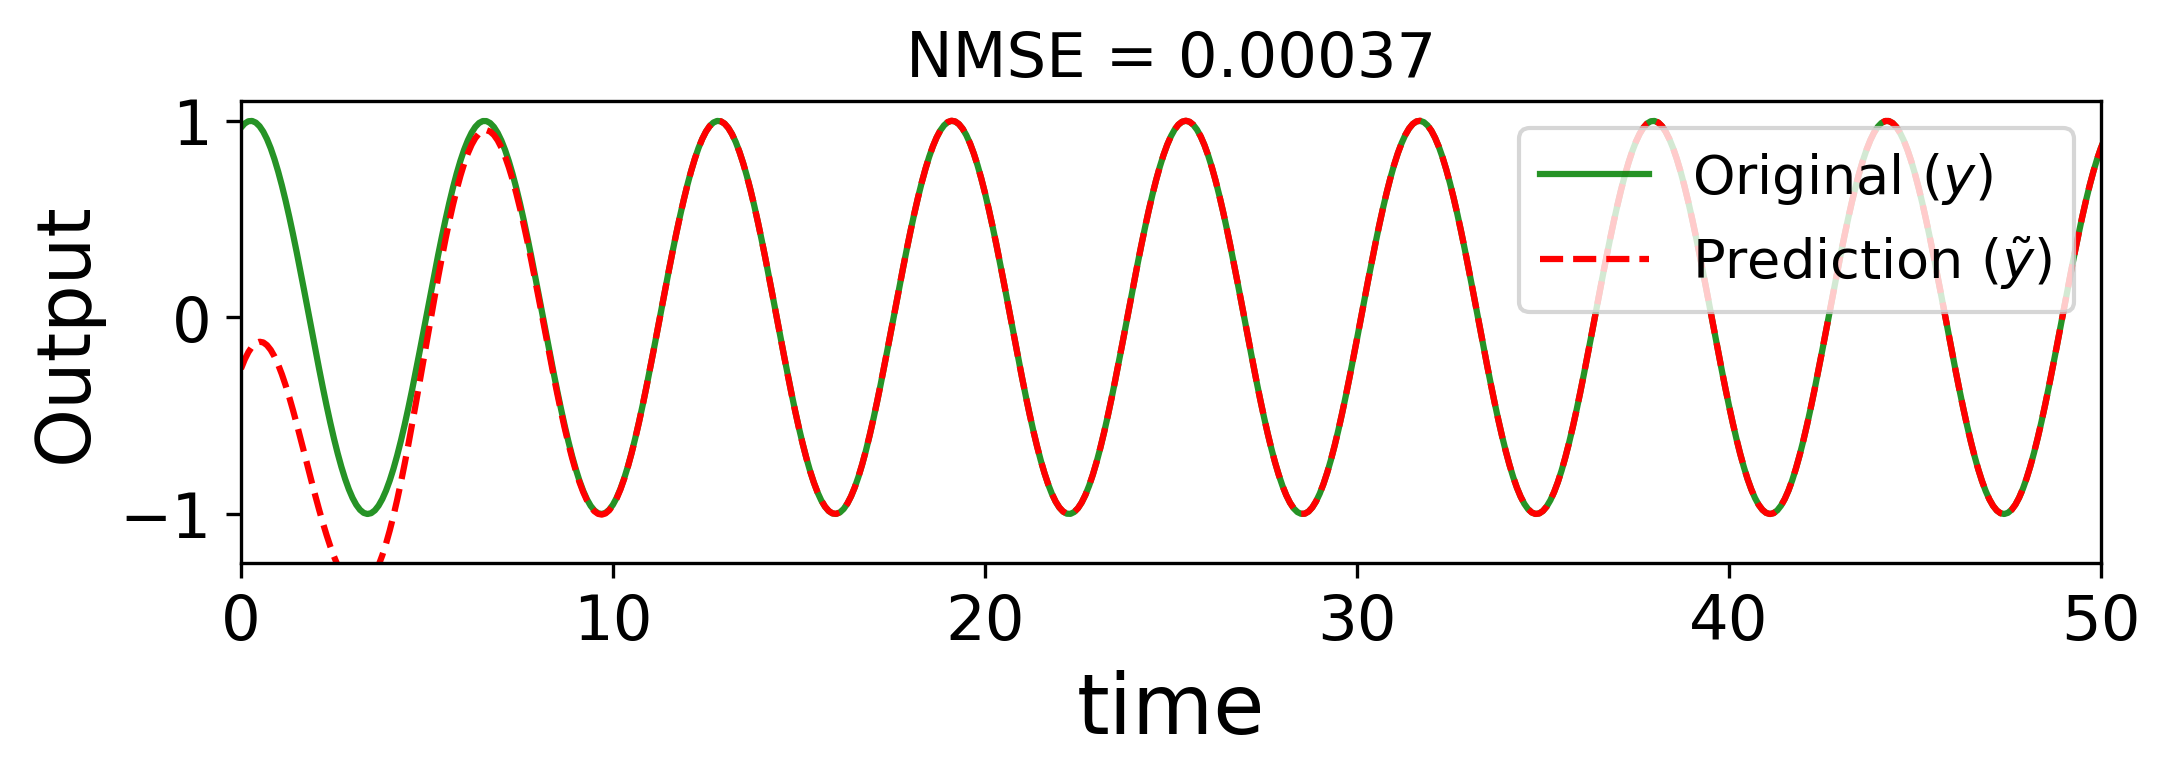

In [24]:
tp=np.arange(0,Y1_Test_pred.shape[0],1)/10

fig, ax = plt.subplots(figsize=(8, 2), dpi=300)
plt.title('NMSE = {:.5f}'.format(error[1]),fontsize=15)
ax.plot(tp, Y1_Test, c='g', alpha=0.85, lw=1.5, label='Original ($y$)')
ax.plot(tp, Y1_Test_pred, c='red', ls='--', lw=1.5, label=r'Prediction ($\tilde{y}$)')
ax.set_ylim(-1.25,1.1)
ax.set_xlim(0, 50)
ax.legend(loc='upper right', fontsize=13)
ax.set_xlabel('time', fontsize=20)
ax.set_ylabel('Output', fontsize=18)
ax.tick_params(labelsize=15)
plt.show()

# Exercise: Make your own reservoir network instead of ER random network 

# Think about it: What other tasks can you solve using RC?